In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import csv
import time
import random
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [2]:
def getSoupFromURL(url):

    try:
        r = requests.get(url)
    except:
        return None

    return BeautifulSoup(r.text, "html5lib")

In [3]:
url = "https://www.basketball-reference.com/teams/"

In [45]:
r = requests.get(url)

In [46]:
text = r.text.replace('<!--', '').replace('-->', '')

In [47]:
soup = BeautifulSoup(text)

In [48]:
soup

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202207051" rel="dns-prefetch"/></head><body><p>
     Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) 
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAM

In [49]:
team_rows = soup.find_all('tr', attrs={'class': 'full_table'})

In [50]:
team_rows

[<tr class="full_table"><th class="left" data-stat="franch_name" scope="row"><a href="/teams/ATL/">Atlanta Hawks</a></th><td class="left" data-stat="lg_id">NBA</td><td class="right" data-stat="year_min">1949-50</td><td class="right" data-stat="year_max">2022-23</td><td class="right" data-stat="years">74</td><td class="right" data-stat="g">5773</td><td class="right" data-stat="wins">2850</td><td class="right" data-stat="losses">2923</td><td class="right" data-stat="win_loss_pct">.494</td><td class="right" data-stat="years_playoffs">48</td><td class="right" data-stat="years_division_champion">12</td><td class="right iz" data-stat="years_conference_champion">0</td><td class="right" data-stat="years_league_champion">1</td></tr>,
 <tr class="full_table"><th class="left" data-stat="franch_name" scope="row"><a href="/teams/BOS/">Boston Celtics</a></th><td class="left" data-stat="lg_id">NBA/BAA</td><td class="right" data-stat="year_min">1946-47</td><td class="right" data-stat="year_max">2022-2

In [51]:
target_teams = []
for team in team_rows:
    for header in team.find('th'):
        abbr = header['href'].split('/')[-2]
    cells = team.find_all('td')
    active_season = cells[2].text
    if active_season == '2022-23':
        target_teams.append(abbr)

In [52]:
target_teams

['ATL',
 'BOS',
 'NJN',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOH',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS']

In [22]:
seasons = [season for season in range(1991, 2022)]

In [23]:
seasons

[1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [24]:
salary_data = []

In [109]:
div_salary

In [27]:
salary_data = []

In [28]:
def find_div_salary(team, season):
    url = f"https://www.basketball-reference.com/teams/{team}/{season}.html"
    time.sleep(random.randint(1, 4))
    r = requests.get(url)
    text = r.text.replace('<!--', '').replace('-->', '')
    soup = BeautifulSoup(text)
    div_salary = soup.find(name='div', attrs={'id': 'all_salaries2'})
    return div_salary

for season in seasons:
    print(f"starting with {season}")
    for team in tqdm.tqdm(target_teams):
        div_salary = find_div_salary(team, season)
        if div_salary is None:
            if team == 'CHA':
                div_salary = find_div_salary('CHH', season)
                if div_salary is None:
                    div_salary = find_div_salary('CHO', season)
            if team == 'NJN':
                div_salary = find_div_salary('BRK', season)
            if team == 'OKC':
                div_salary = find_div_salary('SEA', season)
            if team == 'MEM':
                div_salary = find_div_salary('VAN', season)
            if team == 'WAS':
                div_salary = find_div_salary('WSB', season)
            if team == 'NOP':
                div_salary = find_div_salary('NOH', season)
                if div_salary is None:
                    div_salary = find_div_salary('NOK', season)
            if div_salary is None:
                continue
        salary_rows = div_salary.find('table').find('tbody').find_all('tr')
        for row in salary_rows:
            row_cells = row.find_all('td')
            name = row_cells[0].text
            salary = row_cells[1].text

            salary_data.append(
                {
                    'Season': season,
                    'Player': name,
                    'salary': salary
                }
            )


starting with 1991


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:58<00:00,  3.96s/it]


starting with 1992


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.39s/it]


starting with 1993


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:51<00:00,  3.73s/it]


starting with 1994


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:20<00:00,  4.68s/it]


starting with 1995


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:14<00:00,  4.48s/it]


starting with 1996


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:07<00:00,  4.24s/it]


starting with 1997


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:23<00:00,  4.78s/it]


starting with 1998


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.39s/it]


starting with 1999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:20<00:00,  4.69s/it]


starting with 2000


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:04<00:00,  4.14s/it]


starting with 2001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:52<00:00,  3.76s/it]


starting with 2002


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:56<00:00,  3.88s/it]


starting with 2003


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:06<00:00,  4.22s/it]


starting with 2004


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:20<00:00,  4.68s/it]


starting with 2005


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:19<00:00,  4.66s/it]


starting with 2006


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:00<00:00,  4.02s/it]


starting with 2007


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:03<00:00,  4.12s/it]


starting with 2008


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:02<00:00,  4.07s/it]


starting with 2009


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:42<00:00,  3.42s/it]


starting with 2010


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:03<00:00,  4.13s/it]


starting with 2011


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:51<00:00,  3.70s/it]


starting with 2012


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:10<00:00,  4.34s/it]


starting with 2013


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:57<00:00,  3.92s/it]


starting with 2014


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:08<00:00,  4.27s/it]


starting with 2015


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:23<00:00,  4.78s/it]


starting with 2016


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:10<00:00,  4.36s/it]


starting with 2017


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:07<00:00,  4.24s/it]


starting with 2018


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:14<00:00,  4.47s/it]


starting with 2019


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:05<00:00,  4.17s/it]


starting with 2020


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:07<00:00,  4.24s/it]


starting with 2021


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:08<00:00,  4.28s/it]


In [42]:
salary_data = []

In [53]:
def find_div_salary(team, season):
    url = f"https://www.basketball-reference.com/teams/{team}/{season}.html"
    time.sleep(random.randint(1, 4))
    r = requests.get(url)
    text = r.text.replace('<!--', '').replace('-->', '')
    soup = BeautifulSoup(text)
    div_salary = soup.find(name='div', attrs={'id': 'all_salaries2'})
    return div_salary

for season in ['2022']:
    print(f"starting with {season}")
    for team in tqdm.tqdm(target_teams):
        div_salary = find_div_salary(team, season)
        if div_salary is None:
            if team == 'CHA':
                div_salary = find_div_salary('CHH', season)
                if div_salary is None:
                    div_salary = find_div_salary('CHO', season)
            if team == 'NJN':
                div_salary = find_div_salary('BRK', season)
            if team == 'OKC':
                div_salary = find_div_salary('SEA', season)
            if team == 'MEM':
                div_salary = find_div_salary('VAN', season)
            if team == 'WAS':
                div_salary = find_div_salary('WSB', season)
            if team == 'NOP':
                div_salary = find_div_salary('NOH', season)
                if div_salary is None:
                    div_salary = find_div_salary('NOK', season)
            if div_salary is None:
                continue
        salary_rows = div_salary.find('table').find('tbody').find_all('tr')
        for row in salary_rows:
            row_cells = row.find_all('td')
            name = row_cells[0].text
            salary = row_cells[1].text

            salary_data.append(
                {
                    'Season': season,
                    'Player': name,
                    'salary': salary
                }
            )


starting with 2022


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:45<00:00,  3.51s/it]


In [55]:
additional_data = pd.DataFrame(salary_data)

In [40]:
df = pd.DataFrame(salary_data)

In [41]:
df.to_csv('salaries.csv', index=False)

In [59]:
salary_df.to_csv('salaries_2.csv', index=False)

In [42]:
df = pd.read_csv('salaries.csv')

In [6]:
url = "https://www.basketball-reference.com/teams/CLE/2021.html"

In [7]:
r = requests.get(url)

In [43]:
text = r.text.replace('<!--', '').replace('-->', '')

In [47]:
soup = BeautifulSoup(text)

In [48]:
div_salary = soup.find(name='div', attrs={'id': 'all_salaries2'})

In [63]:
salary_rows = div_salary.find('table').find('tbody').find_all('tr')

In [68]:
salary_data = []

In [69]:
for row in salary_rows:
    row_cells = row.find_all('td')
    name = row_cells[0].text
    salary = row_cells[1].text
        
    salary_data.append(
        {
            'Season': '2021-22',
            'Player': name,
            'salary': salary
        }
    )
    

In [70]:
salary_data

[{'Season': '2021-22', 'Player': 'Kevin Love', 'salary': '$31,258,256'},
 {'Season': '2021-22', 'Player': 'Andre Drummond', 'salary': '$27,957,238'},
 {'Season': '2021-22', 'Player': 'Taurean Prince', 'salary': '$12,250,000'},
 {'Season': '2021-22', 'Player': 'Larry Nance', 'salary': '$11,709,091'},
 {'Season': '2021-22', 'Player': 'Cedi Osman', 'salary': '$8,840,580'},
 {'Season': '2021-22', 'Player': 'Darius Garland', 'salary': '$6,720,720'},
 {'Season': '2021-22', 'Player': 'Isaac Okoro', 'salary': '$6,400,920'},
 {'Season': '2021-22', 'Player': 'Collin Sexton', 'salary': '$4,991,880'},
 {'Season': '2021-22', 'Player': 'Jarrett Allen', 'salary': '$3,909,902'},
 {'Season': '2021-22',
  'Player': 'Matthew Dellavedova',
  'salary': '$2,174,318'},
 {'Season': '2021-22', 'Player': 'Dylan Windler', 'salary': '$2,137,440'},
 {'Season': '2021-22', 'Player': 'Damyean Dotson', 'salary': '$2,000,000'},
 {'Season': '2021-22', 'Player': 'Isaiah Hartenstein', 'salary': '$1,620,564'},
 {'Season': 

In [6]:
url = "https://basketball.realgm.com/nba/info/salary_cap"

r = requests.get(url)

In [8]:
soup = BeautifulSoup(r.text)

In [13]:
table = soup.find('table', attrs={'class': 'basketball compact'})

In [15]:
table.find('thead')

<thead>
<tr><th class="nosort" colspan="4"></th>
<th class="nosort" colspan="3">Mid-Level Exception</th>
</tr><tr><th class="nosort">Season</th>
<th class="nosort">Salary Cap</th>
<th class="nosort">Luxury Tax</th>
<th class="nosort">BAE</th>
<th class="nosort">Standard /<br/>Non-Taxpayer</th>
<th class="nosort">Taxpayer</th>
<th class="nosort">Team Room /<br/>Under Cap</th>
</tr></thead>

In [17]:
columns = ['Season', 'Salary Cap']

In [36]:
data = []
for row in table.find('tbody').find_all('tr'):
    cells = [cell.text for cell in list(row.find_all('td'))]
    data.append(
        {
            'Season': int(cells[2].split("-")[1]),
            'Salary Cap': cells[3]
        }
    )

In [37]:
salary_caps = pd.DataFrame(data)

In [178]:
salary_df = pd.read_csv('salaries_2.csv')

In [179]:
salary_df = salary_df.fillna('$0')

In [180]:
salaries = [int(item[1:].replace(',', '')) for item in salary_df.salary.tolist()]

salary_df.loc[:, 'salary'] = salaries

In [62]:
full_df = pd.merge(left=salary_df, right=salary_caps, on='Season')

In [90]:
full_df = full_df.fillna('$0')

In [91]:
salaries = [int(item[1:].replace(',', '')) for item in full_df.salary.tolist()]

In [93]:
full_df.loc[:, 'salary'] = salaries

In [94]:
caps = [int(item[1:].replace(',', '')) for item in full_df['Salary Cap'].tolist()]

In [95]:
full_df.loc[:, 'Salary Cap'] = caps

In [98]:
active_df = pd.read_csv('active_contracts.csv')

In [99]:
active_df

,Unnamed: 0,Player,Team,2023,2024,2025,2026,2027,2028,Unnamed: 9,Unnamed: 10,-additional
0,1,Stephen Curry,GSW,$48070014,$51915615,$55761216,$59606817,NaN,NaN,Bird,$215353662,curryst01
1,2,Russell Westbrook,LAL,$47063478,NaN,NaN,NaN,NaN,NaN,Bird Rights,$47063478,westbru01
2,3,LeBron James,LAL,$44474988,NaN,NaN,NaN,NaN,NaN,Bird,$44474988,jamesle01
3,4,Kevin Durant,BRK,$44119845,$46407433,$49856021,$53282609,NaN,NaN,Bird,$193665908,duranke01
4,5,Bradley Beal,WAS,$43279250,$46741590,$50203930,$53666270,$57128610,NaN,Bird,$193891040,bealbr01
5,6,Giannis Antetokounmpo,MIL,$42492568,$45640165,$48787763,$51935360,NaN,NaN,Bird,$136920496,antetgi01
6,7,Paul George,LAC,$42492568,$45640165,$48787763,NaN,NaN,NaN,Bird,$88132733,georgpa01
7,8,Damian Lillard,POR,$42492492,$45640084,$48787676,$58545211,$63228828,NaN,1st Round Pick,$195465463,lillada01
8,9,Kawhi Leonard,LAC,$42492492,$45640084,$48787676,NaN,NaN,NaN,Early Bird,$88132576,leonaka01
9,10,John Wall,HOU,$47345760,$6802950,NaN,NaN,NaN,NaN,NaN,$40866760,walljo01


In [70]:
active_df.iloc[0][3]

'$48070014'

In [181]:
seasons = [
    '2023', '2024', '2025', '2026', '2027', '2028'
]

In [182]:
active_df = active_df.fillna('$0')

In [ ]:
active_df.rename()

In [183]:
new_dfs = []

In [184]:
for season in seasons:
    subset_df = active_df.loc[:, ['Player', season]]
    salaries = [int(item[1:]) for item in subset_df[season]]
    subset_df.loc[:, season] = salaries
    subset_df = subset_df.rename(columns={season: 'salary'})
    subset_df.loc[:, 'Season'] = int(season)
    new_dfs.append(subset_df)

In [185]:
concated_new = pd.concat(new_dfs)

In [186]:
concated_reorder = concated_new[['Season', 'Player', 'salary']]

In [187]:
salary_df = pd.concat([salary_df, concated_reorder])

In [188]:
salary_df

,Season,Player,salary
0,1991,Moses Malone,2406000
1,1991,Dominique Wilkins,2065000
2,1991,Jon Koncak,1550000
3,1991,Doc Rivers,895000
4,1991,Rumeal Robinson,800000
5,1991,Tim McCormick,775000
6,1991,Kevin Willis,685000
7,1991,Alexander Volkov,650000
8,1991,John Battle,590000
9,1991,Sidney Moncrief,510000


In [189]:
full_df = pd.merge(left=salary_df, right=salary_caps, on='Season')

full_df = full_df.fillna('$0')

In [190]:
full_df

,Season,Player,salary,Salary Cap
0,1991,Moses Malone,2406000,"$11,871,000"
1,1991,Dominique Wilkins,2065000,"$11,871,000"
2,1991,Jon Koncak,1550000,"$11,871,000"
3,1991,Doc Rivers,895000,"$11,871,000"
4,1991,Rumeal Robinson,800000,"$11,871,000"
5,1991,Tim McCormick,775000,"$11,871,000"
6,1991,Kevin Willis,685000,"$11,871,000"
7,1991,Alexander Volkov,650000,"$11,871,000"
8,1991,John Battle,590000,"$11,871,000"
9,1991,Sidney Moncrief,510000,"$11,871,000"


In [191]:
caps = [int(item[1:].replace(',', '')) for item in full_df['Salary Cap'].tolist()]

full_df.loc[:, 'Salary Cap'] = caps

In [192]:
full_df.to_csv('full_data.csv', index=False)

In [5]:
full_df = pd.read_csv('full_data.csv')

In [6]:
full_df

,Season,Player,salary,Salary Cap
0,1991,Moses Malone,2406000,11871000
1,1991,Dominique Wilkins,2065000,11871000
2,1991,Jon Koncak,1550000,11871000
3,1991,Doc Rivers,895000,11871000
4,1991,Rumeal Robinson,800000,11871000
5,1991,Tim McCormick,775000,11871000
6,1991,Kevin Willis,685000,11871000
7,1991,Alexander Volkov,650000,11871000
8,1991,John Battle,590000,11871000
9,1991,Sidney Moncrief,510000,11871000


In [7]:
full_df.loc[:, 'pct_of_cap'] = full_df.salary / full_df['Salary Cap']

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
filtered = full_df.loc[full_df.pct_of_cap > 0]

In [10]:
newer = filtered.loc[filtered.Season > 2023]
older = filtered.loc[filtered.Season <= 2023]

Text(0.5, 1.0, "Share of players' salaries out of entire Salary Cap")

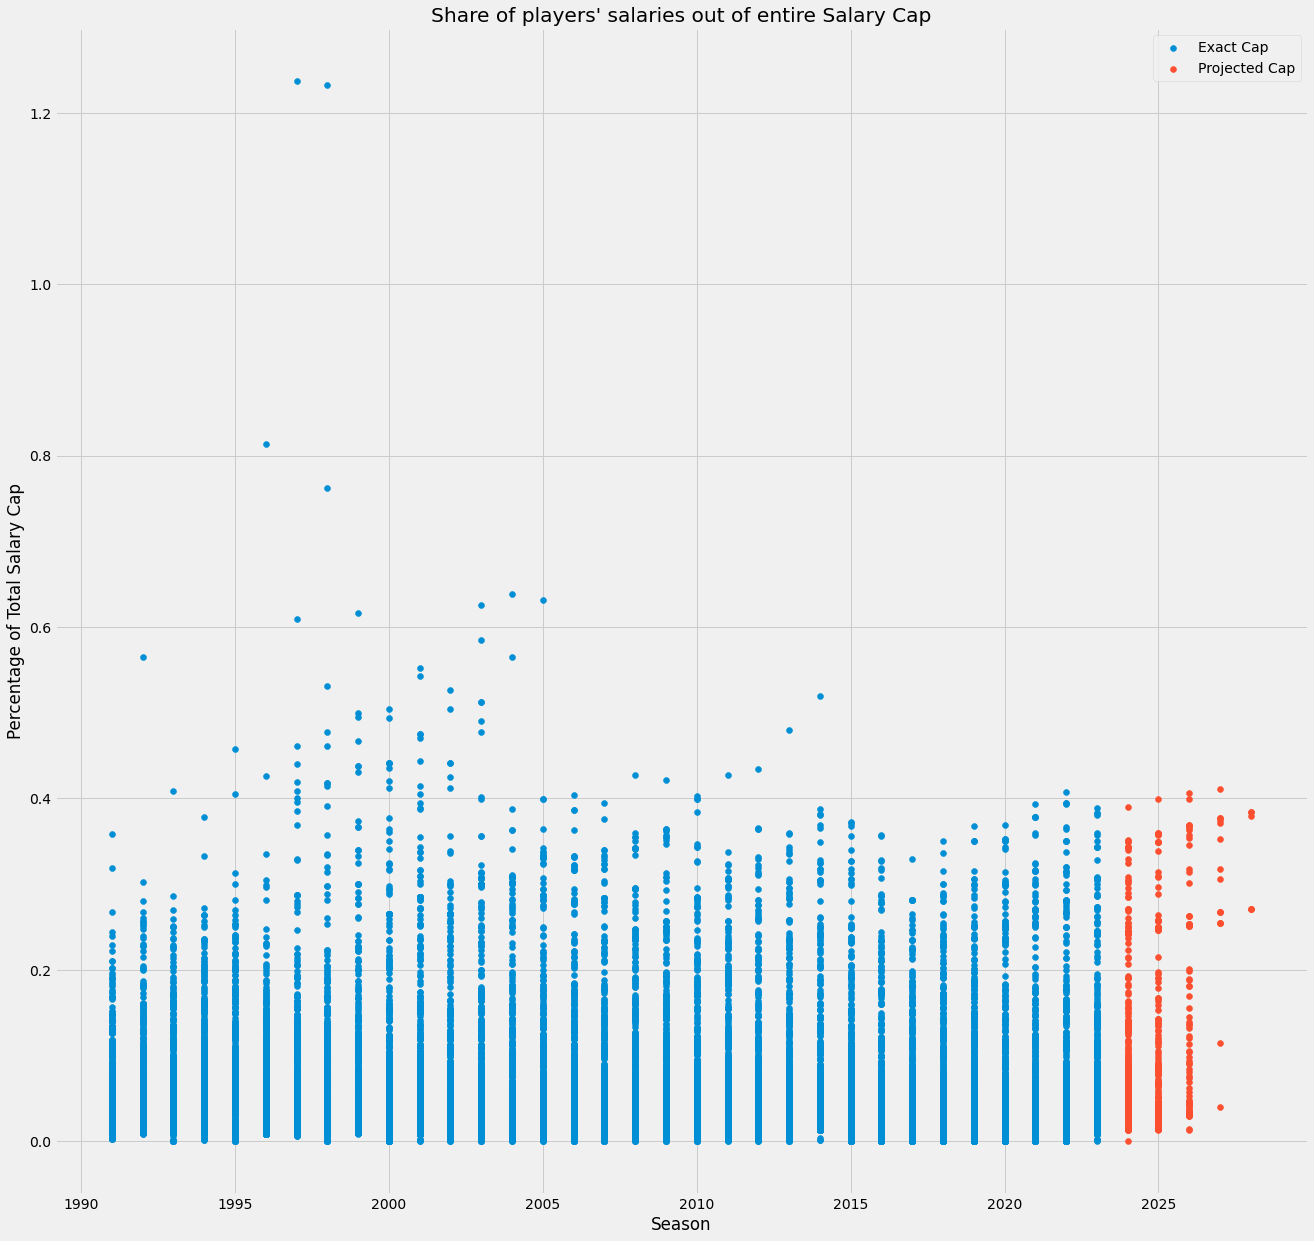

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=older.Season, y=older.pct_of_cap, label='Exact Cap')
ax.scatter(x=newer.Season, y=newer.pct_of_cap, label='Projected Cap')

ax.set_xlabel('Season')
ax.set_ylabel('Percentage of Total Salary Cap')
ax.legend()
ax.set_title("Share of players' salaries out of entire Salary Cap")

In [12]:
newer_seasons = full_df.loc[(full_df.Season > 2006) & (full_df.Season < 2023)]

In [16]:
top_conctracts = newer_seasons.sort_values(by='salary', ascending=False).iloc[:20]

In [21]:
seasons = newer_seasons.Season.unique().tolist()

In [22]:
len(seasons)

16

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


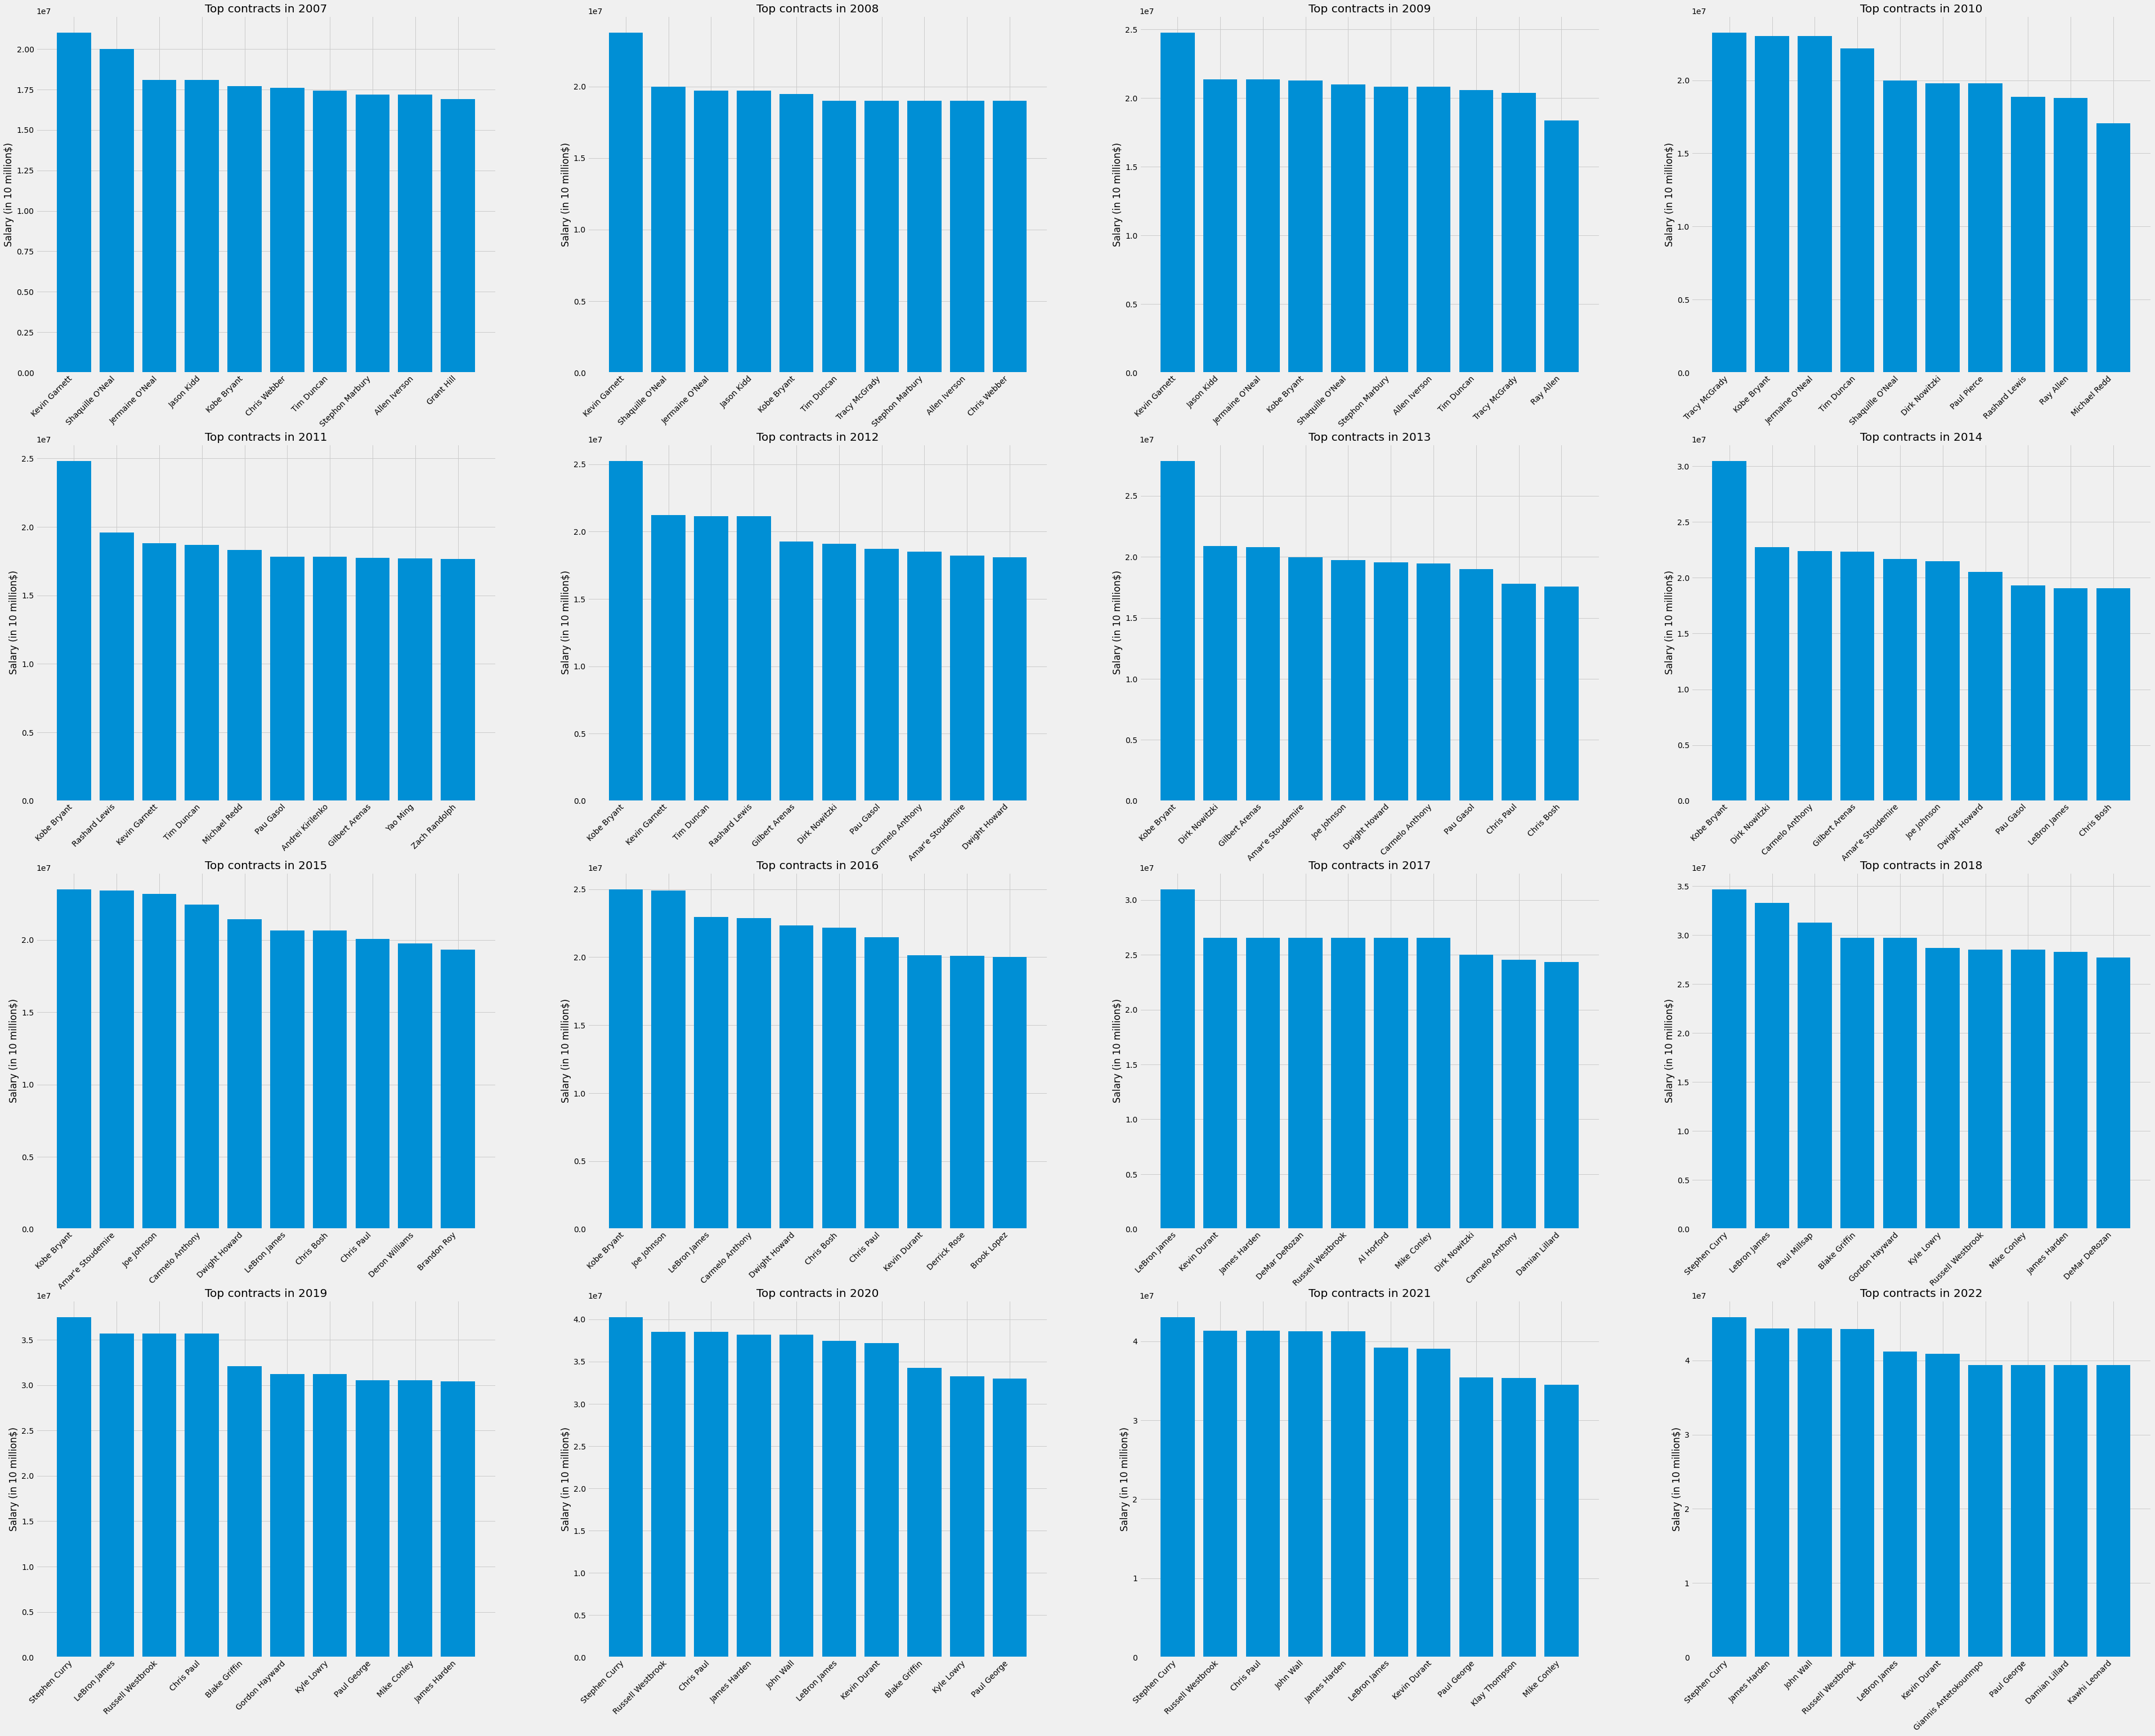

In [38]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(60, 50))
flat_ax = axes.flatten()
for i, season in enumerate(seasons):
    top_contracts = newer_seasons.loc[newer_seasons.Season == season].sort_values(by='salary', ascending=False).iloc[:10]
    
    cur_ax = flat_ax[i]
    cur_ax.bar(x=top_contracts.Player, height=top_contracts.salary)
    cur_ax.set_ylabel(f'Salary (in 10 million$)')
    cur_ax.set_title(f"Top contracts in {season}")
    cur_ax.set_xticklabels(top_contracts.Player.tolist(), rotation = 45, ha='right')
    #cur_ax.tick_params(axis='x', labelrotation=45, va='right')

In [28]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

<BarContainer object of 20 artists>

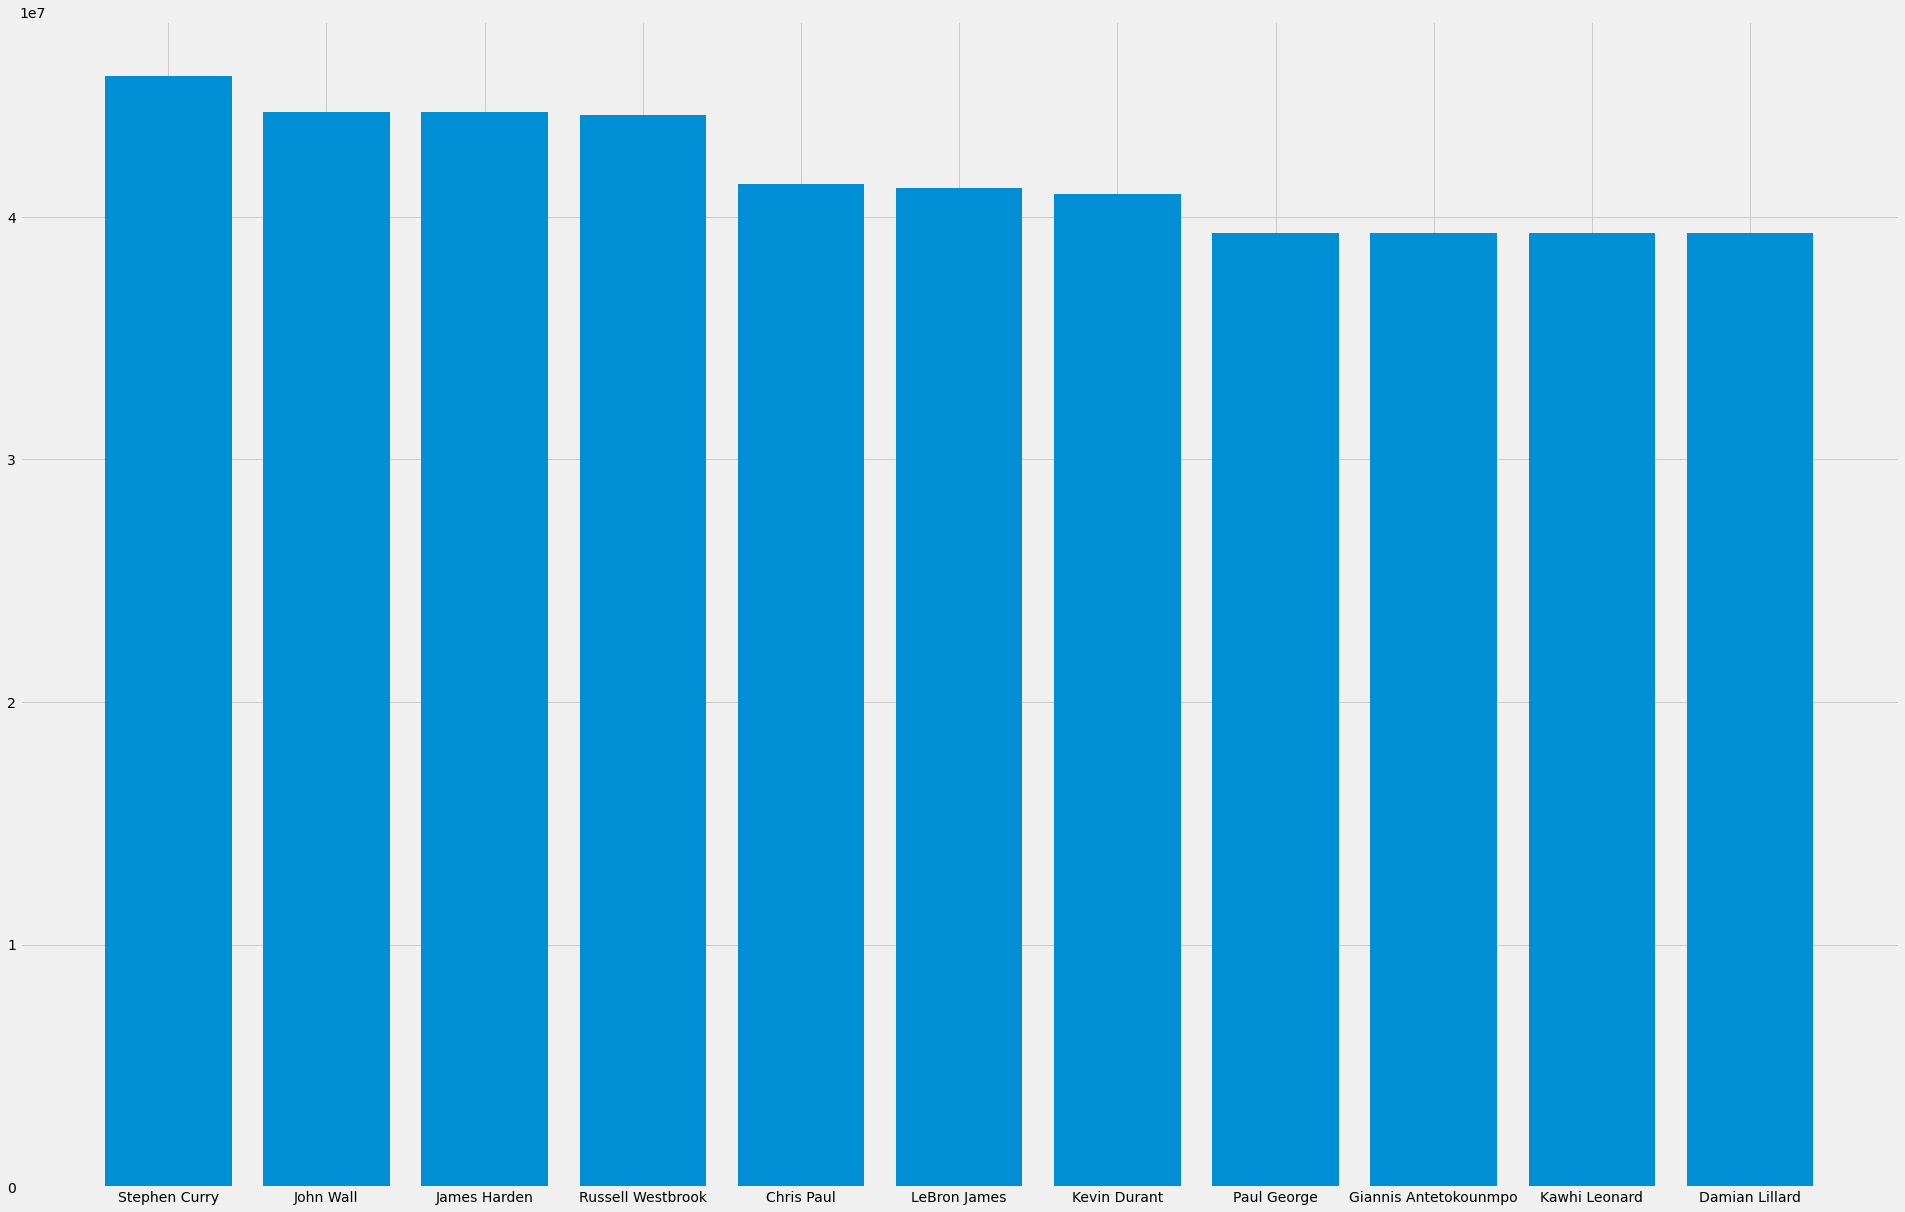

In [19]:
fig, ax = plt.subplots(figsize=(30, 20))

ax.bar(x=top_conctracts.Player, height=top_conctracts.salary)